1. cov structure inside the data
2. traial align to an event
2. get data between two time points
3. understand how decoder is trained in bmi3d

In [1]:
import tables
import numpy as np
import matplotlib.pyplot as plt
print("Imports done! ")

Imports done! 


# get the table

In [2]:
#replace this with your hdf filename
fname = 'temp_data/tmpc7h1f4fm.h5'
hdffile = tables.open_file(fname, 'r')
print(hdffile)

temp_data/tmpc7h1f4fm.h5 (File) ''
Last modif.: 'Wed Oct 14 15:08:43 2020'
Object Tree: 
/ (RootGroup) ''
/task (Table(2099,), shuffle, zlib(5)) ''
/task_msgs (Table(51,), shuffle, zlib(5)) ''



In [3]:
task_msgs_tables = hdffile.root.task_msgs
task_tables = hdffile.root.task
print(task_tables.description)

print()
print(task_msgs_tables)

Description([('cursor', '(3,)f8'), ('loop_time', '(1,)f8'), ('decoder_state', '(7, 1)f8'), ('internal_decoder_state', '(7, 1)f8'), ('target_state', '(7, 1)f8'), ('update_bmi', '(1,)f8'), ('spike_counts', '(4, 1)f8'), ('bin_edges', '(2,)f8'), ('ctrl_input', '(7,)f8'), ('assist_level', '(1,)f8'), ('target', '(3,)f8'), ('target_index', '(1,)i4')])

/task_msgs (Table(51,), shuffle, zlib(5)) ''


# task msgs data

## look what in the data, eh

In [4]:
print(task_msgs_tables.col)


<bound method Table.col of /task_msgs (Table(51,), shuffle, zlib(5)) ''
  description := {
  "msg": StringCol(itemsize=256, shape=(), dflt=b'', pos=0),
  "time": UInt32Col(shape=(), dflt=0, pos=1)}
  byteorder := 'little'
  chunkshape := (252,)>


In [19]:
# look deeper into what is in here, eh
# zip msg and time together
msg_time = list(zip(task_msgs_tables.col('msg'), 
               task_msgs_tables.col('time')))
msg_time
# returns a list of msg and time in tuples

[(b'wait', 0),
 (b'target', 1),
 (b'hold', 2),
 (b'targ_transition', 15),
 (b'target', 16),
 (b'hold', 174),
 (b'targ_transition', 187),
 (b'reward', 188),
 (b'wait', 219),
 (b'target', 220),
 (b'hold', 462),
 (b'targ_transition', 475),
 (b'target', 476),
 (b'hold', 606),
 (b'targ_transition', 619),
 (b'reward', 620),
 (b'wait', 651),
 (b'target', 652),
 (b'hold', 810),
 (b'targ_transition', 823),
 (b'target', 824),
 (b'hold', 948),
 (b'targ_transition', 961),
 (b'reward', 962),
 (b'wait', 993),
 (b'target', 994),
 (b'hold', 1164),
 (b'targ_transition', 1177),
 (b'target', 1178),
 (b'hold', 1326),
 (b'targ_transition', 1339),
 (b'reward', 1340),
 (b'wait', 1371),
 (b'target', 1372),
 (b'hold', 1560),
 (b'targ_transition', 1573),
 (b'target', 1574),
 (b'hold', 1662),
 (b'targ_transition', 1675),
 (b'reward', 1676),
 (b'wait', 1706),
 (b'target', 1707),
 (b'hold', 1872),
 (b'targ_transition', 1885),
 (b'target', 1886),
 (b'hold', 2052),
 (b'targ_transition', 2065),
 (b'reward', 2066),
 (

In [23]:
def calculate_reward_rate(list_of_time_event):
    return list(filter(lambda is_reward: is_reward[0] == b'reward', list_of_time_event))



calculate_reward_rate(msg_time)

[(b'reward', 188),
 (b'reward', 620),
 (b'reward', 962),
 (b'reward', 1340),
 (b'reward', 1676),
 (b'reward', 2066)]

this tells us what happens at what time, sort of thing

In [6]:
#b'a string'.decode('ascii')
#to convert binary string into regular string.

## use xarray to proc the data

# behavioural

## look at some trajectories

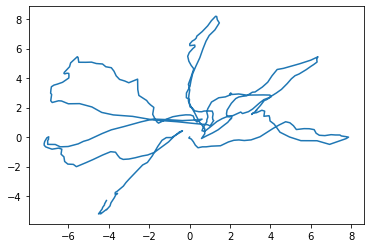

(2099, 3)

In [7]:
#plot out the cursor trajectories
cursor_coor = task_tables.col('cursor')
plt.plot(cursor_coor[:,0], cursor_coor[:,2])
plt.show()

cursor_coor.shape


## we can bundle the behaviour and task data together
the shape and the traject is exactly the same with the trial trajectory, eh

this just shows that I have 6 trials 
and I cannot tell which trial is which, eh. 

## eye tracking (optional)

#plot out the eye tracking results
eye_array = hdffile.root.eyetracker
print(eye_array)
plt.plot(eye_array[:,0], eye_array[:,1])

## mocap data

#plot out the mocap data
mocap_array = hdffile.root.motiontracker



#  neural data

In [8]:
# see what we are dealing with

print(task_tables.description)

Description([('cursor', '(3,)f8'), ('loop_time', '(1,)f8'), ('decoder_state', '(7, 1)f8'), ('internal_decoder_state', '(7, 1)f8'), ('target_state', '(7, 1)f8'), ('update_bmi', '(1,)f8'), ('spike_counts', '(4, 1)f8'), ('bin_edges', '(2,)f8'), ('ctrl_input', '(7,)f8'), ('assist_level', '(1,)f8'), ('target', '(3,)f8'), ('target_index', '(1,)i4')])


In [9]:
cursor = np.squeeze(task_tables.col('cursor'))
decoder_state = np.squeeze(task_tables.col('decoder_state'))
internal_decoder_state = np.squeeze(task_tables.col('internal_decoder_state'))

target_state = np.squeeze(task_tables.col('target_state'))
spike_counts = np.squeeze(task_tables.col('spike_counts'))

print(f'decoder_state.shape: {decoder_state.shape}')


decoder_state.shape: (2099, 7)


## before
        sim_C = np.zeros((N_NEURONS, N_STATES))
        # control x positive directions
        sim_C[0, :] = np.array([0, 0, 0, 1, 0, 0, 0])
        sim_C[1, :] = np.array([0, 0, 0, -1, 0, 0, 0])
        # control z positive directions
        sim_C[2, :] = np.array([0, 0, 0, 0, 0, 1, 0])
        sim_C[3, :] = np.array([0, 0, 0, 0, 0, -1, 0])

## change at trial 3, after
    #configure params changes
    sim_C_new = np.zeros((N_NEURONS, N_STATES))
    sim_C_new[0, :] = np.array([0, 0, 0, 0, 1, 0, 0])
    sim_C_new[1, :] = np.array([0, 0, 0, 0, -1, 0, 0])
    # control z positive directions
    sim_C_new[2, :] = np.array([0, 0, 0, 1, 0, 0, 0])
    sim_C_new[3, :] = np.array([0, 0, 0, -1, 0, 0, 0])


they all have the same time vec? Is there a better way to bundle together the input information?

how about letting the monkey chasing a moving target?

harder while the monkey trying to learn the decoder, eh?

internal_decoder_state.shape: (2099, 7)


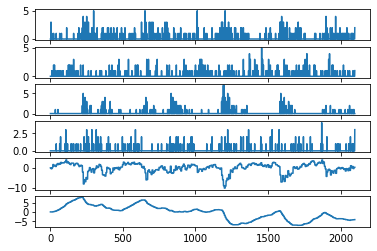

In [10]:
print(f'internal_decoder_state.shape: {internal_decoder_state.shape}')

plt.subplot(6,1,1)
plt.plot(spike_counts[:,0])

plt.subplot(6,1,2)
plt.plot(spike_counts[:,1])

plt.subplot(6,1,3)
plt.plot(spike_counts[:,2])

plt.subplot(6,1,4)
plt.plot(spike_counts[:,3])


plt.subplot(6,1,5)
plt.plot(internal_decoder_state[:,3])

plt.subplot(6,1,6)
plt.plot(cursor[:,0])
#plt.plot(internal_decoder_state[:,3])
#plt.plot(cursor[:,2])

# look at the joint spike-target cov structure
we have to be careful tho that  
we changed the decoder at middle of the experiment


## append the spike -target  arrays together

## calculate cov structure

Estimate a covariance matrix, given data and weights.
numpy.cov(m, y=None, rowvar=True)


In [11]:
cursor.shape

(2099, 3)

In [12]:
spike_counts.shape

(2099, 4)

In [13]:
spike_target = np.concatenate((spike_counts, cursor), 
                              axis=1, 
                              out=None)
spike_target.shape

(2099, 7)

In [14]:
spike_target = np.cov(spike_target.T)
spike_target.shape

(7, 7)

ins: display the thing

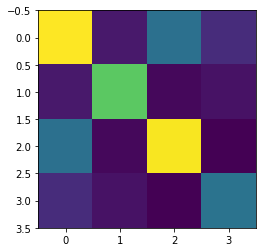

In [18]:
plt.imshow(spike_target[0:4, 0:4])